In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.utils import resample
from sklearn.metrics import accuracy_score,f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report
import networkx as nx
from sklearn.svm import SVC
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost as xgb

In [1]:
import time

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
cd '/content/gdrive/MyDrive/8803'

/content/gdrive/MyDrive/8803


In [6]:
# read data

In [7]:
data=pd.read_csv('Copy of Coronavirus Tweets.csv',encoding='latin-1')

In [8]:
data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [9]:
#extract data

In [9]:
extracted_data=data[['OriginalTweet','Sentiment']]

In [10]:
extracted_data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [12]:
#clean text which contain the special characters, links and covert all the Uppercase to the Lowercase

In [11]:
tweet_data=extracted_data['OriginalTweet'].values.tolist()
for index,text in enumerate(tweet_data):
    text=re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', text)
    text=re.sub(r'[^\w\s]', '', text)
    text=re.sub(r'@[\w]*','',text)
    text=re.sub(r'[^\w\s]', '', text)
    text=text.replace('\n','')
    text=re.sub(r"^\s+", "", text)
    text=re.sub(' +', ' ',text)
    text=re.sub(r"^\s+|\s+$", "", text)
    text=text.lower()
    tweet_data[index]=text

In [12]:
extracted_data['preprocess_tweet']=tweet_data[:len(data)]

In [13]:
extracted_data.head()

,OriginalTweet,Sentiment,preprocess_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil_gahan chrisitv and and
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the covid...


<Axes: >

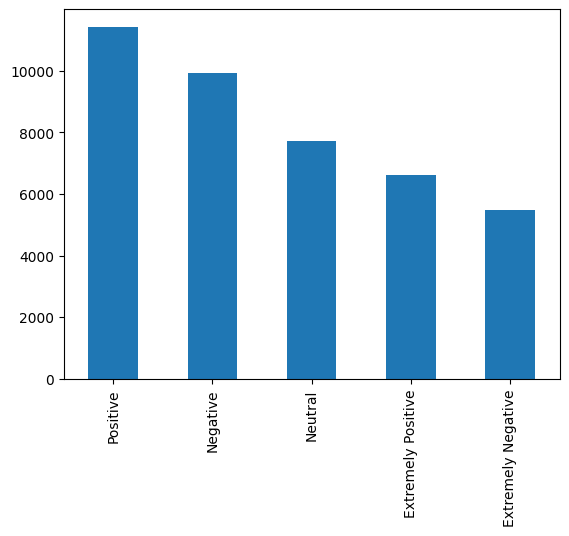

In [14]:
extracted_data['Sentiment'].value_counts().plot(kind='bar')

In [17]:
# 0-negative, 1-neutral, Postive

In [18]:
def assign_numeric(row):
    if row['Sentiment'] == 'Neutral':
        val = 1
    elif row['Sentiment'] == 'Negative' or row['Sentiment'] == 'Extremely Negative':
        val = 0
    else:
        val = 1
    return val

In [19]:
extracted_data['label'] = extracted_data.apply(assign_numeric, axis=1)

In [20]:
extracted_data.head()

,OriginalTweet,Sentiment,preprocess_tweet,label
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil_gahan chrisitv and and,1
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,1
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,1
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,1
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the covid...,0


In [88]:
#extracted_data=extracted_data[(extracted_data['label']==1) | (extracted_data['label']==0)]

In [21]:
extracted_data

,OriginalTweet,Sentiment,preprocess_tweet,label
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil_gahan chrisitv and and,1
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,1
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,1
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,1
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the covid...,0
...,...,...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral,airline pilots offering to stock supermarket s...,1
41153,Response to complaint not provided citing COVI...,Extremely Negative,response to complaint not provided citing covi...,0
41154,You know itÂs getting tough when @KameronWild...,Positive,you know itâs getting tough when kameronwilds ...,1
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,is it wrong that the smell of hand sanitizer i...,1


<Axes: >

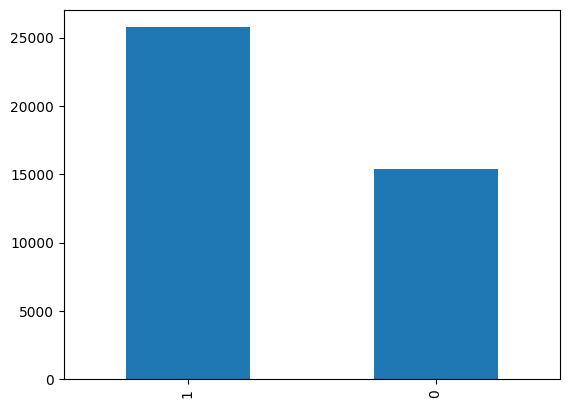

In [22]:
extracted_data['label'].value_counts().plot(kind='bar')

In [23]:
new_data=extracted_data.groupby('label').apply(lambda x: x.sample(10000)).reset_index(drop=True)

In [57]:
new_data

,OriginalTweet,Sentiment,preprocess_tweet,label
0,#Nigeria to lower petrol pump prices to 130 #n...,Extremely Negative,nigeria to lower petrol pump prices to 130 nai...,0
1,Will a reusable bag ban make grocery store sho...,Negative,will a reusable bag ban make grocery store sho...,0
2,So very day I go to the supermarket is the sam...,Extremely Negative,so very day i go to the supermarket is the sam...,0
3,"For those desperately in need of #ToiletPaper,...",Negative,for those desperately in need of toiletpaper t...,0
4,@StopandShop @StopandShop gave associates a 10...,Negative,stopandshop stopandshop gave associates a 10 r...,0
...,...,...,...,...
19995,Smart brands are using cutting-edge methods to...,Positive,smart brands are using cuttingedge methods to ...,1
19996,Went out to our local Edeka supermarket for so...,Positive,went out to our local edeka supermarket for so...,1
19997,Grocery store employee dies after being diagno...,Neutral,grocery store employee dies after being diagno...,1
19998,Spoke to someone in Cameroon and found out tha...,Positive,spoke to someone in cameroon and found out tha...,1


<Axes: >

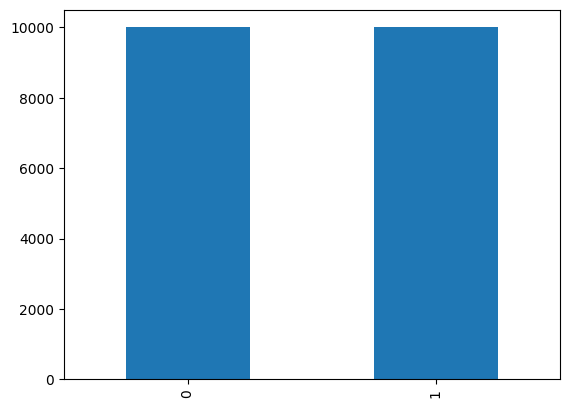

In [24]:
new_data['label'].value_counts().plot(kind='bar')

In [25]:
tfidf=TfidfVectorizer(ngram_range=(1, 2),min_df=2,max_features=4000)
tfidf.fit(new_data['preprocess_tweet'])
tfidf_df=tfidf.transform(new_data['preprocess_tweet']).toarray()

In [26]:
tfidf_df.shape

(20000, 4000)

In [27]:
tfidf_df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
# split dataset into training dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(tfidf_df,new_data['label'],test_size=0.3, shuffle=True,random_state=42,stratify = new_data.label.values)

In [29]:
X_train.shape

(14000, 4000)

In [30]:
X_test, X_val, y_test, y_val=train_test_split(X_test, y_test, test_size=0.3, random_state=42)

In [101]:
# Build SVM model

In [49]:
svm_clf=SVC(random_state=42)
start = time.time()
svm_clf.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 1267.701184272766s


In [50]:
predicted = svm_clf.predict(X_test)

In [51]:
accuracy=accuracy_score(y_test,predicted)

In [52]:
accuracy

0.7919047619047619

In [53]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      2107
           1       0.78      0.82      0.80      2093

    accuracy                           0.79      4200
   macro avg       0.79      0.79      0.79      4200
weighted avg       0.79      0.79      0.79      4200



In [54]:
cm = confusion_matrix(y_test, predicted, labels=svm_clf.classes_)

In [55]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_clf.classes_)

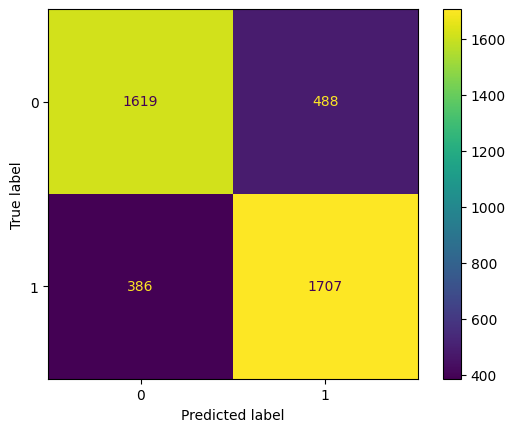

In [56]:
disp.plot()

In [87]:
# CNN model

In [31]:
CNN_model = models.Sequential()
CNN_model.add(layers.Conv2D(32,(1,3), activation='relu',input_shape=(1,4000,1)))
CNN_model.add(layers.MaxPooling2D((1, 3)))
CNN_model.add(layers.BatchNormalization())
CNN_model.add(layers.Conv2D(64, (1,3), activation='relu'))
CNN_model.add(layers.MaxPooling2D((1, 3)))
CNN_model.add(layers.BatchNormalization())
CNN_model.add(layers.Conv2D(64, (1, 3), activation='relu'))
CNN_model.add(layers.Flatten())
CNN_model.add(layers.Dense(2))

In [32]:
CNN_model.compile(tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 3998, 32)       128       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1332, 32)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 1, 1332, 32)      128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 1330, 64)       6208      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 443, 64)       0         
 2D)                                                             
                                                        

In [34]:
train_data=X_train.reshape((X_train.shape[0],1,X_train.shape[1],1))
train_label=np.asarray(y_train)

In [35]:
train_data.shape

(14000, 1, 4000, 1)

In [36]:
val_data=X_val.reshape((X_val.shape[0],1,X_val.shape[1],1))
val_label=np.asarray(y_val)

In [37]:
train_data.shape

(14000, 1, 4000, 1)

In [38]:
test_data=X_test.reshape((X_test.shape[0],1,X_test.shape[1],1))
test_label=np.asarray(y_test)

In [110]:
start = time.time()
history = CNN_model.fit(train_data,train_label,validation_data=(val_data, val_label),epochs=10)
stop = time.time()
print(f"Training time: {stop - start}s")

Epoch 1/10
438/438 [==============================] - 97s 127ms/step - loss: 0.6008 - accuracy: 0.6766 - val_loss: 0.6375 - val_accuracy: 0.6328
Epoch 2/10
438/438 [==============================] - 50s 113ms/step - loss: 0.4811 - accuracy: 0.7682 - val_loss: 0.4794 - val_accuracy: 0.7733
Epoch 3/10
438/438 [==============================] - 48s 110ms/step - loss: 0.4265 - accuracy: 0.8031 - val_loss: 0.4589 - val_accuracy: 0.7878
Epoch 4/10
438/438 [==============================] - 48s 109ms/step - loss: 0.3924 - accuracy: 0.8233 - val_loss: 0.4619 - val_accuracy: 0.7728
Epoch 5/10
438/438 [==============================] - 48s 109ms/step - loss: 0.3647 - accuracy: 0.8389 - val_loss: 0.4763 - val_accuracy: 0.7728
Epoch 6/10
438/438 [==============================] - 47s 108ms/step - loss: 0.3442 - accuracy: 0.8541 - val_loss: 0.4521 - val_accuracy: 0.7900
Epoch 7/10
438/438 [==============================] - 47s 108ms/step - loss: 0.3267 - accuracy: 0.8650 - val_loss: 0.4625 - val_ac

In [111]:
pred=CNN_model.predict(test_data)

132/132 [==============================] - 3s 25ms/step


In [112]:
prediction=np.argmax(pred, 1)
print(classification_report(test_label,prediction))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2107
           1       0.78      0.77      0.78      2093

    accuracy                           0.78      4200
   macro avg       0.78      0.78      0.78      4200
weighted avg       0.78      0.78      0.78      4200



In [113]:
cm = confusion_matrix(y_test, prediction, labels=[0,1])

In [114]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])

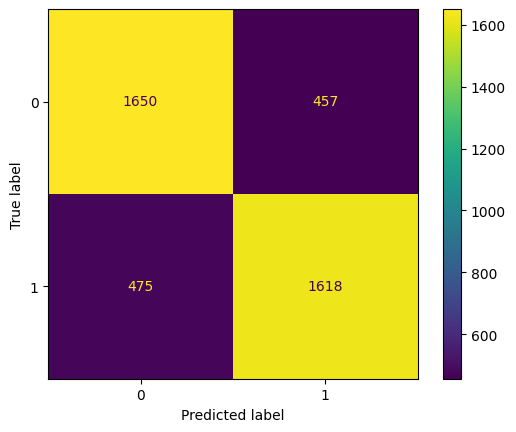

In [115]:
disp.plot()

In [ ]:
# Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
RF_clf = RandomForestClassifier(random_state=42)

In [118]:
start = time.time()
RF_clf.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 41.47428321838379s


In [119]:
predicted = RF_clf.predict(X_test)

In [120]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      2107
           1       0.75      0.77      0.76      2093

    accuracy                           0.76      4200
   macro avg       0.76      0.76      0.76      4200
weighted avg       0.76      0.76      0.76      4200



In [121]:
cm = confusion_matrix(y_test, predicted, labels=RF_clf.classes_)

In [122]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RF_clf.classes_)

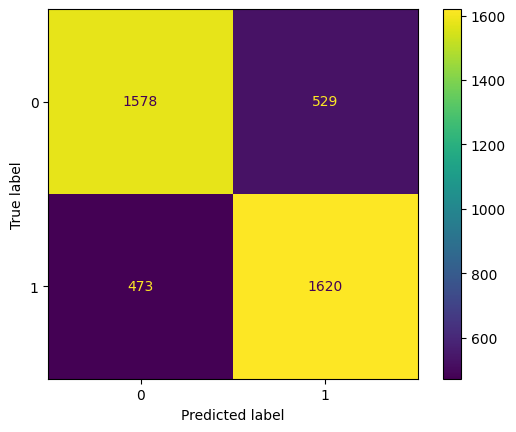

In [123]:
disp.plot()

In [ ]:
# Naive Bayes

In [125]:
nb_clf = MultinomialNB()
start = time.time()
nb_clf.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.3352997303009033s


In [126]:
predicted = nb_clf.predict(X_test)

In [127]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      2107
           1       0.75      0.76      0.75      2093

    accuracy                           0.75      4200
   macro avg       0.75      0.75      0.75      4200
weighted avg       0.75      0.75      0.75      4200



In [128]:
cm = confusion_matrix(y_test, predicted, labels=RF_clf.classes_)

In [129]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb_clf.classes_)

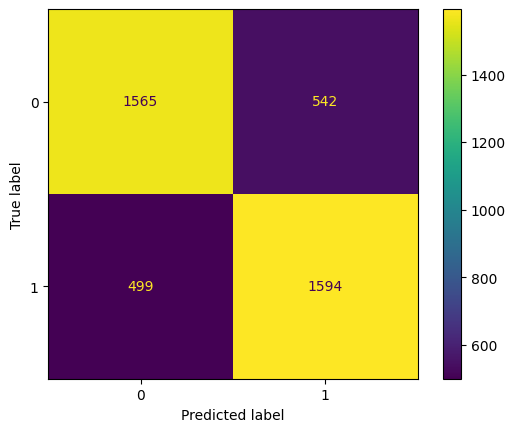

In [130]:
disp.plot()

In [131]:
# XG Boost

In [132]:
xgb_clf = xgb.XGBClassifier(random_state=42)

In [133]:
start = time.time()
xgb_clf.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 118.37748551368713s


In [134]:
predicted = xgb_clf.predict(X_test)

In [135]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      2107
           1       0.75      0.85      0.80      2093

    accuracy                           0.79      4200
   macro avg       0.79      0.79      0.79      4200
weighted avg       0.79      0.79      0.79      4200



In [136]:
cm = confusion_matrix(y_test, predicted, labels=xgb_clf.classes_)

In [137]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb_clf.classes_)

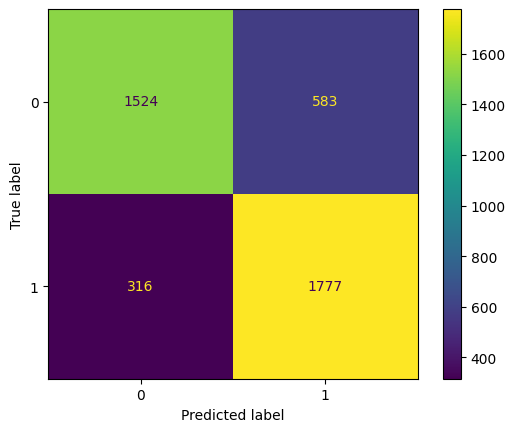

In [138]:
disp.plot()